# Inteligência Artificial: Classificação
## Teste de Performance - TP1

Faça a importação diretamente do Github e armazene os dados em um dataframe único. Se desejar, utilize a biblioteca Pandas.

Após carregar a base, execute as seguintes operações:
- Avalie a existência de dados ausentes e elimine estas observações.
- Recodifique a variável alvo, utilizando (1) para Horeca (Hotel/Restaurant/Café) e (0) para Retail channel.
- Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.

A partir do dataframe totalmente ajustado, aplique um modelo Random Forest, utilizando as opções padrão do classificador.
1. Apresente as métricas acurácia, precision, recall e F1-score deste modelo. Apresente também a matriz de confusão resultante do processo de treinamento.
2. Execute o algoritmo XGBoost na mesma base (após os ajustes pedidos), utilizando apenas as configurações padrão do modelo. Apresente as mesmas métricas da questão acima.
3. Qual modelo você utilizaria, a partir dos resultados da execução dos dois modelos? Justifique sua resposta.


Acurácia (Random Forest): 0.955
Precisão (Random Forest): 0.865
Recall (Random Forest):   1.000
F1-Score (Random Forest): 0.928


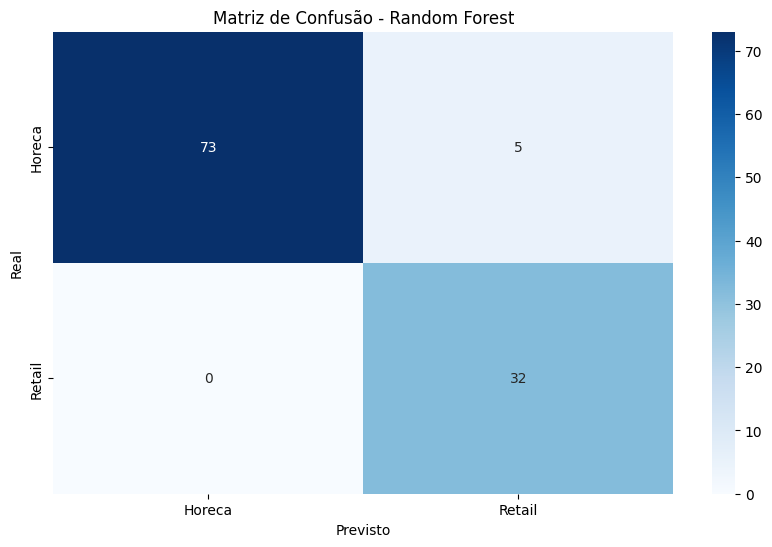

Acurácia (XGBoost): 0.936
Precisão (XGBoost): 0.838
Recall (XGBoost):   0.969
F1-Score (XGBoost): 0.899


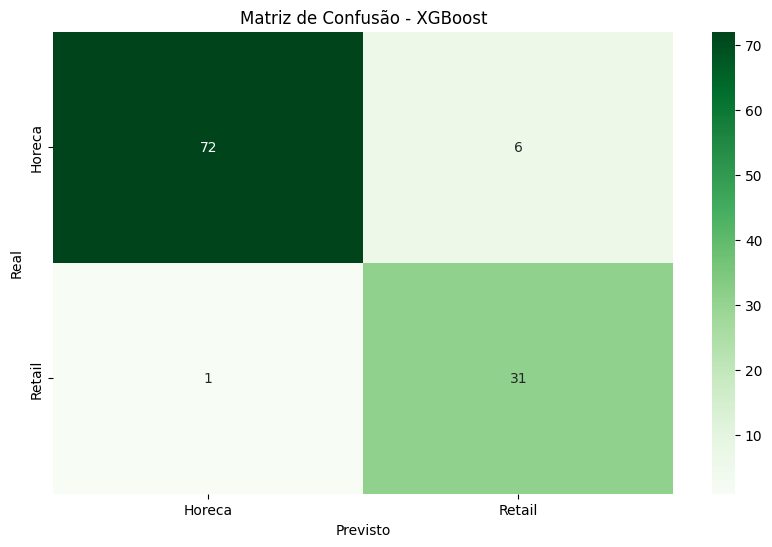

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# --------------------------------------------------------------------------------
# Carregando e preparando os dados
# --------------------------------------------------------------------------------

# Importando os dados
customers_data = pd.read_csv("https://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv")

# Limpando os dados
customers_data = customers_data.dropna()

# Definindo as variáveis
features = customers_data[["Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]

# Definindo a variável alvo (target) e recodificando os valores:
# 1: Horeca, 2: Retail será recodificado para 0 e 1, respectivamente
target = customers_data["Channel"].map({1: 0, 2: 1})

# Dividindo os dados em conjuntos de treino e teste
RANDOM_STATE = 11
TEST_SIZE = 0.25
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)


# --------------------------------------------------------------------------------
# Atividade 1
# --------------------------------------------------------------------------------

# Criando o modelo de Random Forest
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(feature_train, target_train)

# Fazendo as previsões para o Random Forest
target_pred_rf = rf.predict(feature_test)

# Calculando as métricas do modelo
accuracy_rf = accuracy_score(target_test, target_pred_rf)
precision_rf = precision_score(target_test, target_pred_rf)
recall_rf = recall_score(target_test, target_pred_rf)
f1_rf = f1_score(target_test, target_pred_rf)

# Mostrando as métricas
print(f"Acurácia (Random Forest): {accuracy_rf:.3f}")
print(f"Precisão (Random Forest): {precision_rf:.3f}")
print(f"Recall (Random Forest):   {recall_rf:.3f}")
print(f"F1-Score (Random Forest): {f1_rf:.3f}")

# Gerando as matrizes de confusão para o Random Forest
cm_rf = confusion_matrix(target_test, target_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Horeca", "Retail"], yticklabels=["Horeca", "Retail"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()


# --------------------------------------------------------------------------------
# Atividade 2
# --------------------------------------------------------------------------------

# Criando o modelo de XGBoost
xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(feature_train, target_train)

# Fazendo as previsões para o XGBoost
target_pred_xgb = xgb.predict(feature_test)

# Calculando as métricas do modelo
accuracy_xgb = accuracy_score(target_test, target_pred_xgb)
precision_xgb = precision_score(target_test, target_pred_xgb)
recall_xgb = recall_score(target_test, target_pred_xgb)
f1_xgb = f1_score(target_test, target_pred_xgb)

# Mostrando as métricas
print(f"Acurácia (XGBoost): {accuracy_xgb:.3f}")
print(f"Precisão (XGBoost): {precision_xgb:.3f}")
print(f"Recall (XGBoost):   {recall_xgb:.3f}")
print(f"F1-Score (XGBoost): {f1_xgb:.3f}")

# Gerando a matriz de confusão para o XGBoost
cm_xgb = confusion_matrix(target_test, target_pred_xgb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", xticklabels=["Horeca", "Retail"], yticklabels=["Horeca", "Retail"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.show()
